# Class

In [1]:
import numpy as np

클래스는 객체 지향 프로그래밍의 핵심 역할을 하기 때문에 파이썬의 가장 기본적인 부분이라 할 수 있다.  
파이썬의 모든 것, 예를 들어, integers, lists, dictionaries, functions 등은 object(객체)라고 불리운다.  
모든 object에는 type이 있으며, object type은 class를 사용하여 생성된다.  
Instance는 클래스에 속하여 생성된 특정 object이다.  
예를 들어 list는 Python의 class이며, list를 하나 생성하면 이는 instance가 된다.

### Class 정의하기

클래스를 정의하는 기본 방법은 다음과 같다.

In [2]:
class RationalNumber: 
      pass  # 실행할 코드가 없음을 의미

이 클래스의 instance는 ```RationalNumber()```를 통해 생성된다.

In [3]:
r = RationalNumber()

In [4]:
type(r)

__main__.RationalNumber

In [5]:
isinstance(r, RationalNumber)

True

### The ```__init__``` method

```__init__``` 과 같이 이름 양쪽에 이중 밑줄이 있는 특수한 method들이 있다.

이러한 method 들은 대부분은 백그라운드에서 작동하며 프로그램에서 필요할 때 자동으로 호출되며, 명시적으로 호출할 수 없다. 

예를 들어, 새 객체를 만들 때 Python은 자동으로 ```__new__``` method를 호출하고, 
이 method는 차례로 ```__init__``` method를 호출한다.

```__init__``` method는 class가 object의 attribute을 초기화하도록 하고, 그 외에 다른 기능은 없다.

```__str__``` method는 객체를 ```print()```할 때 호출된다.

아래에서 ```self```는 생성되는 instance를 의미하고, 이 클래스에는 ```numerator```와 ```denominator```라는 attributes가 존재한다.

각 attribute는 ```.```을 통해 접근할 수 있다.

In [6]:
class RationalNumber:
    def __init__(self, numerator, denominator):
        self.numerator = numerator
        self.denominator = denominator

In [7]:
q = RationalNumber(10, 20)    
q

In [8]:
q.numerator                  

10

In [9]:
q.denominator  

20

필요한 method를 추가하기

In [10]:
class RationalNumber:
    
    def __init__(self, numerator, denominator):
        self.numerator = numerator
        self.denominator = denominator
        
    def convert2float(self):
        return float(self.numerator) / float(self.denominator)   

```convert2float(self)```가 정의될 때는 ```self```를 parameter로 가지지만, ```.```를 사용한 다음의 문법으로 호출될 때 ```self```에 해당하는 인자는 생략된다.

In [11]:
q = RationalNumber(10, 20)    # Defines a new object
q.convert2float() # returns 0.5  

0.5

다음과 동치이다.

In [12]:
RationalNumber.convert2float(q)

0.5

또다른 특수 method인 ```__repr__```를 살펴보자.
이 method는 python 커널 출력에 표현되는 방식을 정의한다. 

In [13]:
class RationalNumber:
    def __init__(self, numerator, denominator):
        self.numerator = numerator
        self.denominator = denominator
        
    def __repr__(self): 
        return f'{self.numerator} / {self.denominator}'
    
    def convert2float(self):
        return float(self.numerator) / float(self.denominator)  

In [14]:
q = RationalNumber(10, 20) 
q

10 / 20

In [15]:
q.__repr__()

'10 / 20'

In [16]:
repr(q)

'10 / 20'

```print```문을 위해서는 ```__str__```를 따로 정의할 수 있으나, 여기서는 정의하지 않았으므로, ```___repr___```의 방식을 공유한다.

In [17]:
print(q)

10 / 20


In [18]:
str(q)

'10 / 20'

```repr()```과 ```str()```은 비슷한 역할을 하지만, ```repr()```은 개발자에 보여줄 내용을 담고, ```str()```은 사용자에게 보여줄 내용을 담는다는 특징이 있다.  
Class의 ```__repr__```와 ```__str__```을 구현하여, built-in 함수인 ```repr()```과 ```str()```가 연동되도록 한다.

```add``` method를 추가하여, class의 기능을 확장하여 보자.  
이 method에서는 ```RationalNumber```와 ```int```, 혹은, ```RationalNumber```와 ```RationalNumber```의 합 연산을 수행한다.

In [19]:
class RationalNumber:
    
    def __init__(self, numerator, denominator):
        self.numerator = numerator
        self.denominator = denominator
        
    def __repr__(self): 
        return f'{self.numerator} / {self.denominator}'
    
    def convert2float(self):
        return float(self.numerator) / float(self.denominator)  
    
    def add(self, other): 
        p1, q1 = self.numerator, self.denominator 
        if isinstance(other, int):        
            p2, q2 = other, 1 
        else: 
            p2, q2 = other.numerator, other.denominator 
        return RationalNumber(p1 * q2 + p2 * q1, q1 * q2)

In [20]:
q = RationalNumber(1, 2)
p = RationalNumber(1, 3)
q.add(p)  

5 / 6

```add```를 ```__add__```로 이름을 바꾸면서 ```+``` operator에 overloading 할 수 있다.

In [21]:
class RationalNumber:
    def __init__(self, numerator, denominator):
        self.numerator = numerator
        self.denominator = denominator

    def __repr__(self): 
        return f'{self.numerator} / {self.denominator}'
    
    def convert2float(self):
        return float(self.numerator) / float(self.denominator)  
    
    def __add__(self, other): 
        p1, q1 = self.numerator, self.denominator 
        if isinstance(other, int):        
            p2, q2 = other, 1 
        else: 
            p2, q2 = other.numerator, other.denominator 
        return RationalNumber(p1 * q2 + p2 * q1, q1 * q2)

In [22]:
q = RationalNumber(1, 2)
p = RationalNumber(1, 3)
q.__add__(p)  

5 / 6

In [23]:
q + p

5 / 6

In [24]:
q + 4

9 / 2

그 외에, ```=```를 overloading 하는 ```__eq__``` method, ```int + RationalNumber```가 가능하게 하는 ```__radd__```를 정의한다. 

In [25]:
class RationalNumber:
    def __init__(self, numerator, denominator):
        self.numerator = numerator
        self.denominator = denominator
    def convert2float(self):
        return float(self.numerator) / float(self.denominator)  
    def __repr__(self): 
        return f'{self.numerator} / {self.denominator}'
    def __add__(self, other): 
        p1, q1 = self.numerator, self.denominator 
        if isinstance(other, int):        
            p2, q2 = other, 1 
        else: 
            p2, q2 = other.numerator, other.denominator 
        return RationalNumber(p1 * q2 + p2 * q1, q1 * q2)
    def __eq__(self, other):
        return self.denominator * other.numerator == \
            self.numerator * other.denominator
    def __radd__(self, other):
        return self + other

In [26]:
p = RationalNumber(1, 2) 
q = RationalNumber(2, 4)
p == q 

True

In [27]:
5 + p

11 / 2

다양한 연산자 overloading은 다음을 참고한다.  
https://docs.python.org/3/library/operator.html

```__call__``` 함수는 instance를 함수처럼 호출하여 사용할 수 있게 한다.

In [28]:
class RationalNumber:
    
    def __init__(self, numerator, denominator):
        self.numerator = numerator
        self.denominator = denominator
        
    def __call__(self, numerator, denominator):
        self.numerator = numerator
        self.denominator = denominator
        
    def convert2float(self):
        return float(self.numerator) / float(self.denominator)  
    def __repr__(self): 
        return f'{self.numerator} / {self.denominator}'
    def __add__(self, other): 
        p1, q1 = self.numerator, self.denominator 
        if isinstance(other, int):        
            p2, q2 = other, 1 
        else: 
            p2, q2 = other.numerator, other.denominator 
        return RationalNumber(p1 * q2 + p2 * q1, q1 * q2)
    def __eq__(self, other):
        return self.denominator * other.numerator == \
            self.numerator * other.denominator
    def __radd__(self, other):
        return self + other
    

In [29]:
p = RationalNumber(4,5)
p

4 / 5

In [30]:
p(2,5)
p

2 / 5

In [31]:
p.__call__(2, 5)
p

2 / 5

```__getitem__``` 함수는 ```[]```을 사용한 indexing이 가능하게 한다.  
Class가 iterator의 성질을 지닐 때 유용하다.  

### Iterator

Iterable object는 ```for```문 등에서 object를 순차적으로 생성할 수 있는 object들이다. 다음의 문법으로 사용된다.

```for element in obj:```

대표적으로 list나 ```range``` object 등이 있다.

Iterable object인지의 여부를 확인하는 방법은 ```__iter__``` method가 존재하는지 살펴보는 것이다.

이는 ```dir()``` 함수 등을 통해 확인할 수 있다.

In [32]:
dir(range(10))

['__bool__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'count',
 'index',
 'start',
 'step',
 'stop']

Iterable object의 ```__iter__``` method가 호출되면 iterator가 생성된다.  
Iterator에는 ```__next___``` method가 존재하여, 다음 차례의 원소를 반환한다. 

In [33]:
l = [1,2]  #iterable object
li = l.__iter__()  # iterator
li

In [34]:
li.__next__()

1

In [35]:
li.__next__()

2

Python은 generator라는 것을 제공하여, 누구나 iterator를 만들어 쓸수 있도록 한다.  
Generator는 보통 ```yield``` 키워드를 통하여 생성되며, 차례차례 값을 생성하는 개념이다.  

In [36]:
# generator for odd numbers less than n
def odd_numbers(n): 
    for k in range(n): 
        if k % 2 == 1: 
            yield k

In [37]:
g = odd_numbers(10)
g

<generator object odd_numbers at 0x000001C24227F4A0>

In [38]:
for k in g: print(k)

1
3
5
7
9


다음의 ```Recursion3Term``` class는 iterable object이다.

In [39]:
class  Recursion3Term:
    def __init__(self, a0, a1, u0, u1):
        self.coeff = [a1, a0]
        self.initial = [u1, u0]
    def __iter__(self):
        u1, u0 = self.initial
        yield u0  
        yield u1
        a1, a0 = self.coeff
        while True :
            u1, u0 = a1 * u1 + a0 * u0, u1
            yield u1

In [40]:
r3 = Recursion3Term(-0.35, 1.2, 1, 1)

In [41]:
r3_i = r3.__iter__()

In [42]:
r3_i.__next__()

1

In [43]:
r3_i.__next__()

1

In [44]:
r3_i.__next__()

0.85

In [45]:
r3_i.__next__()

0.67

In [46]:
for i, r in enumerate(r3):
    if i <= 5:
        print(i, r)  
    if i == 5: break

0 1
1 1
2 0.85
3 0.67
4 0.5065000000000001
5 0.3733


```__get_item```을 추가하여, ```[]```을 사용할 수 있다.

여기서 ```itertools.islice```가 사용되었는데, slicing 방법을 통하여 

In [47]:
import itertools

class  Recursion3Term:
    def __init__(self, a0, a1, u0, u1):
        self.coeff = [a1, a0]
        self.initial = [u1, u0]
    def __iter__(self):
        u1, u0 = self.initial
        yield u0  # (see also Iterators section in Chapter 9) 
        yield u1
        a1, a0 = self.coeff
        while True :
            u1, u0 = a1 * u1 + a0 * u0, u1
            yield u1
            
    def __getitem__(self, k):
        return list(itertools.islice(self, k, k + 1))[0]

In [48]:
r3 = Recursion3Term(-0.35, 1.2, 1, 1)

In [49]:
r3[5]

0.3733

### Attributes that depend on each other

아래 ```Triangle``` class의 attribute ```A, B, C```는 n-차원 상에서 삼각형의 꼭지점 좌표를 말한다.  
그리고 ```a, b, c```는 꼭지점 좌표에 의해 결정되는 변 벡터이다.

In [50]:
class Triangle:
    def __init__(self,  A, B, C):
        self.A = np.array(A)
        self.B = np.array(B)
        self.C = np.array(C)
        self.a = self.C - self.B
        self.b = self.C - self.A
        self.c = self.B - self.A
    def area(self):
        return abs(np.cross(self.b, self.c)) / 2 

In [51]:
tr = Triangle([0., 0.], [1., 0.], [0., 1.])

In [52]:
tr.area()

0.5

위 정의대로라면 꼭지점 중 하나의 좌표가 변경된다 하더라도, 변 벡터가 변경되지 않는 문제가 있다.  
그에 따라 면적 계산도 잘못된다.

In [53]:
tr.B = [12., 0.]
tr.area()

0.5

```property``` method는 특정 attribute를 getter, setter, deleter method와 연결해 준다.  

getter, setter, deleter method들은 attribute를 액세스할 때, 정할 때, 지울 때 추가적으로 할 일들을 정의한다.  

```property``` method는 다음의 문법을 가진다.  

```attribute = property(fget = get_attr, fset = set_attr, fdel = del_attr, doc = string)```

In [54]:
class Triangle:

    def __init__(self, A, B, C):
        self._A = np.array(A)
        self._B = np.array(B)
        self._C = np.array(C)
        self._a = self._C - self._B
        self._b = self._C - self._A
        self._c = self._B - self._A
    def area(self):
        return abs(np.cross(self._c, self._b)) / 2.
    
    def set_B(self, B):
        print("Setting value...The sides are readjusted.")
        self._B = B
        self._a = self._C - self._B
        self._c = self._B - self._A
    def get_B(self):
        print("Getting value...")
        return self._B
    
    def del_Pt(self):
        raise Exception('A triangle point cannot be deleted')
    
    B = property(fget = get_B, fset = set_B, fdel = del_Pt)

In [55]:
tr = Triangle([0., 0.], [1., 0.], [0., 1.])
tr._a

array([-1.,  1.])

In [56]:
tr._B

array([1., 0.])

In [57]:
# get_B를 통해 접근
tr.B

Getting value...


array([1., 0.])

In [58]:
# set_B를 통해 설정하기 때문에 변들의 정보 변경
tr.B = [12., 0.]
tr.area() 

Setting value...The sides are readjusted.


6.0

In [59]:
tr._a

array([-12.,   1.])

아래처럼 설정하면 변의 정보가 바뀌지 않는다.

In [60]:
tr._B = [10, 0]
tr.area()

6.0

종종 클래스 내에 ```_```로 시작하는 attribute들이 있는데, 이 attribute들은 ```.```을 이용하여 직접 접근하기 보다는 setter와 getter를 이용하여 접근하도록 암묵적으로 합의되어 있다.  

다른 언어에서는 private라는 키워드를 통해 지정되나 python에서는 private을 직접적으로 지정하지는 않는다.

```@property```라는 decorator를 사용하여, 비슷하게 구현할 수 있다.(데코레이터에 대해서는 추후 더 알아볼 예정)

getter는 ```@property``` 데코레이터 바로 밑에 적도록 한다.  

이 때 사용되는 getter의 이름 ```B```는 그 아래 구현된 setter와 deleter에서 계속 이용된다.
* 여기서 ```B```는 property-name이라고도 한다.

setter에는 ```@property-name.setter```의 형식으로 데코레이터를 작성한다.
* 이 예제에서는 ```@B.setter````

deleter에는 ```@property-name.deleter```의 형식을 데코레이터를 작성한다.
* 이 예제에서는 ```@B.deleter````

In [61]:
class Triangle:
    def __init__(self, A, B, C):
        self._A = np.array(A)
        self._B = np.array(B)
        self._C = np.array(C)
        self._a = self._C - self._B
        self._b = self._C - self._A
        self._c = self._B - self._A
    
    def area(self):
        return abs(np.cross(self._c, self._b)) / 2.
    
    @property
    def B(self):
        print("Getting value...")
        return self._B
    
    @B.setter
    def B(self, B):
        print("Setting value...The sides are readjusted.")
        self._B = B
        self._a = self._C - self._B
        self._c = self._B - self._A
        
    @B.deleter
    def B(self):
        # del tr.B 를 했을 때 주어질 에러
        raise Exception('A triangle point cannot be deleted')

In [62]:
tr = Triangle([0., 0.], [1., 0.], [0., 1.])
tr.B = [12., 0.]
tr.area()

Setting value...The sides are readjusted.


6.0

### Bounded and unbounded method

Class에 정의된 method는 instance에 귀속되지 않았을 때는 unbounded method라고 불리우고, instance가 생성되어 귀속되면 bounded method라고 불리운다.

In [63]:
class A:
    def func(self,arg):
        pass

In [64]:
# unbounded method
A.func

<function __main__.A.func(self, arg)>

In [65]:
instA = A()  # we create an instance
instA.func

<bound method A.func of <__main__.A object at 0x000001C24229D190>>

### Class attribute and class method

보통 attribute과 method는 instance에 귀속되어 활용되나, 때로는 class 자체에 귀속되어, 해당 클래스로 생성된 모든 instance가 공통으로 공유하는 경우가 있다. 이를 class attribute과 class method라고 한다.  
아래 예제에서 ```tol```이 class attribute이다.

In [66]:
class Newton:
    tol = 1e-8 # this is a class attribute
    def __init__(self, f):
        self.f = f # this is not a class attribute

In [67]:
f = lambda x: x**2
g = lambda x: 3*x
N1 = Newton(f)
N2 = Newton(g)

In [68]:
N1.tol 

1e-08

In [69]:
N2.tol 

1e-08

Class를 통해 ```tol```의 값을 변경하면, 변경 사항은 모든 instance에 적용된다.

In [70]:
Newton.tol = 1e-10
N1.tol

1e-10

In [71]:
N2.tol

1e-10

하지만 개별 instance의 ```tol```을 변경하면 다른 instance에 영향을 미치지 않는다.

In [72]:
N2.tol = 1e-4
N1.tol

1e-10

위의 코드 실행으로 이제 ```N2.tol```은 ```Newton.tol```과 분리되어 독립적이다. 즉, ```Newton.tol```의 변경이 ```N2.tol```에 영향을 미치지 않는다.

In [73]:
Newton.tol = 1e-5 

In [74]:
N1.tol

1e-05

In [75]:
N2.tol

0.0001

### Class method

Class method는 instance가 아닌 class에 bound된 method를 말한다. 

실무에서 class method는 종종 클래스의 instance를 생성하려는 목적으로 사용된다.

Class method를 정의하기 위해서는 decorator line이라 불리우는 추가적인 코드가 필요하다.  

```@classmethod```

아래 코드에서 by_points는 class method이며, 관습상 ```self```대신 ```cls```를 첫 번째 parameter로 활용한다.  
Class method는 종종 instance가 생성되기 전에 전처리적인 단계로도 활용된다. 

아래의 ```Polynomial``` class는 ```coeff```를 통해 instance가 생성되나, 경우에 따라서는 ```by_points``` method와 numpy의 ```polyfit``` 함수를 이용한 ineterpolation 방법으로 정의되기도 한다.

In [76]:
class Polynomial:
    def __init__(self, coeff):
        self.coeff = np.array(coeff)
        
    @classmethod
    def by_points(cls, x, y):
        degree = x.shape[0] - 1
        coeff = np.polyfit(x, y, degree)
        return cls(coeff) 
    
    def __eq__(self, other):
        return np.allclose(self.coeff, other.coeff)

```Polynomial.by_points()```로 호출한다. 즉 ```Class.method()``` 형식이다.

In [77]:
# interpolation으로 정의된 polynomial
p1 = Polynomial.by_points(np.array([0., 1.]), np.array([0., 1.]))
p1.coeff

array([1.0000000e+00, 1.5818787e-17])

In [78]:
# coeff로 정의된 polynomial
p2 = Polynomial([1., 0.])

In [79]:
p1 == p2

True

위 예제에서 보듯이 파이썬의 클래스에는 생성자가 ```__init__``` method뿐이기 때문에, 다른 생성자를 필요로 할 경우 클래스 method를 활용하는 것이 효과적이다.

### Subclass와 상속

하위 클래스(subclass)와 상속은 객체지향 프로그래밍의 핵심 개념이라 볼 수 있다.  
아래의 미분 방정식 해결 예제를 통해 이 개념들을 이해해 보자.  

전형적인 미분 방정식의 형태은 다음과 같다.

$$ x'(t) = f(x(t), t), \quad x(0) = x_0, \quad t \in [t_0, t_e] $$

이 방정식을 풀기 위한 수치적 방법 중 하나인 one-step method에서는, 어떤 step size $h$에 대해, 다음을 만족하는 $u$ 벡터를 순차적으로 계산한다.

$$ u_{i+1} = u_{i} + h \Phi(f, u_i, t_i, h), \quad u_0 = x_0 $$

여기서 $\Phi$는 step function으로 여러 정의 방법이 있다. 

* Explicit Euler : $\Phi(f, u_i, t_i, h) = f(u_i, t_i)$  
* Midpoint rule : $\Phi(f, u_i, t_i, h) = f(u_i + \frac{h}{2}f(u_i), t_i + \frac{h}{2})$  
* Runge-Kutta 4 : $\Phi(f, u_i, t_i, h) =  \frac{1}{6}(s_1 + s_2 + s_3 + s_4)$ with 
  * $s_1 = f(u_i, t_i), \enspace s_2 = f(u_i + \frac{h}{2}s_i, u_i + \frac{h}{2}),\enspace  s_3 = f(u_i + \frac{h}{2}s_2, t_i + \frac{h}{2}),\enspace  s_4 = f(u_i + s_3, t_i + h)$
  
이 방법들을 포괄하는 class를 생성하기 위해, 먼저 ```OneStepMethod```라는 base class를 생성한다.

$\Phi$ 함수는 아래 코드에서 ```step()``` method에 해당하는데, 이는 아직 구현되지 않았다.  
```OneStepMethod```를 상속한 자식 class에서 구체적으로 구현해야 한다.  

```__init__``` method에서 함수 ```f```, 초기값 ```x0```, $t$의 범위인 ```interval```, discretization의 수 ```N```을 지정한다.

In [80]:
import matplotlib.pyplot as mp

class OneStepMethod:
    def __init__(self, f, x0, interval, N):
        self.f = f
        self.x0 = x0
        self.interval = [t0, te] = interval
        self.grid = np.linspace(t0, te, N)
        self.h = (te - t0) / N

    def generate(self):
        ti, ui = self.grid[0], self.x0
        yield ti, ui
        for t in self.grid[1:]:
            ui = ui + self.h * self.step(self.f, ui, ti)
            ti = t
            yield ti, ui

    def solve(self):
        self.solution = np.array(list(self.generate()))

    def plot(self):
        mp.plot(self.solution[:, 0], self.solution[:, 1])

    # Phi에 해당하는 step function
    def step(self, f, u, t):
        raise NotImplementedError()

In [81]:
osm = OneStepMethod(lambda x, t : x + t, x0 = 0, interval = [0, 1], N = 100)

아직 ```step``` 함수가 구현되지 않았기 때문에, ```osm.solve()```를 실행하면 ```raise NotImplementedError()```에 의해 에러가 발생한다.

즉, 이 부모 클래스는 이 부모 클래스의 성질을 상속받은 적절한 자식 클래스가 존재하여야 실제 문제를 해결할 수 있다.

구체적인 구현이 포함된 자식 클래스를 정의한다.

자식 클래스의 정의 방법은 간단하다.

```class CHILD(PARENT):```

아래에서 ```ExplicitEuler```와 ```MidPointRule```는 ```OneStepMethod```를 상속받은 자식 클래스이다.

상속은 부모 클래스의 attribute과 method를 물려받는다.

In [82]:
class ExplicitEuler(OneStepMethod):
    def step(self, f, u, t):
        return f(u, t)

In [83]:
class MidPointRule(OneStepMethod):
    def step(self, f, u, t):
        return f(u + self.h / 2 * f(u, t), t + self.h / 2)

In [84]:
dir(ExplicitEuler)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'generate',
 'plot',
 'solve',
 'step']

In [85]:
def f(x, t): return -0.5 * x

In [86]:
euler = ExplicitEuler(f, x0 = 15., interval = [0., 10.], N = 20)

In [87]:
type(euler)

__main__.ExplicitEuler

```euler```는 ```ExplicitEuler```이면서 ```OneStepMethod```이기도 하다.

In [88]:
isinstance(euler, ExplicitEuler)

True

In [89]:
isinstance(euler, OneStepMethod)

True

In [90]:
euler.solve()
euler.solution

array([[ 0.        , 15.        ],
       [ 0.52631579, 11.25      ],
       [ 1.05263158,  8.4375    ],
       [ 1.57894737,  6.328125  ],
       [ 2.10526316,  4.74609375],
       [ 2.63157895,  3.55957031],
       [ 3.15789474,  2.66967773],
       [ 3.68421053,  2.0022583 ],
       [ 4.21052632,  1.50169373],
       [ 4.73684211,  1.12627029],
       [ 5.26315789,  0.84470272],
       [ 5.78947368,  0.63352704],
       [ 6.31578947,  0.47514528],
       [ 6.84210526,  0.35635896],
       [ 7.36842105,  0.26726922],
       [ 7.89473684,  0.20045192],
       [ 8.42105263,  0.15033894],
       [ 8.94736842,  0.1127542 ],
       [ 9.47368421,  0.08456565],
       [10.        ,  0.06342424]])

In [91]:
midpoint = MidPointRule(f, 15., [0., 10.], 20)
midpoint.solve()

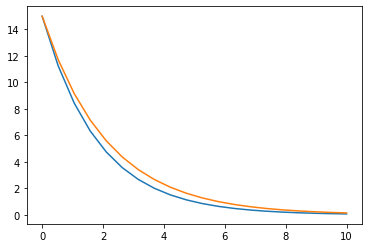

In [92]:
euler.plot()
midpoint.plot()

인자를 일일이 입력하는 것이 번거롭다면, 다음과 같이 작성할 수 있다.

In [93]:
argument_list = [f, 15., [0., 10.], 20]
euler = ExplicitEuler(*argument_list)
midpoint = MidPointRule(*argument_list)

In [94]:
type(euler)

__main__.ExplicitEuler

In [95]:
isinstance(euler, OneStepMethod)

True

In [96]:
isinstance(euler, ExplicitEuler)

True

만약 부모 class의 method나 attribute에 접근하고 싶다면, ```super()``` 명령을 이용한다.  

```super()```에는 subclass의 이름과 객체 두 개의 인자가 전달된다.  

대표적인 예제로, 하위 class의 ```__init__```에서 부모 클래스의 ```__init__```을 확장하고 싶을 때 사용한다.   

아래 코드에서 ```*args, **kwargs```는 가변 길이의 인자들이나, 키워드 인자들을 부모 클래스의 ```__init__```으로 그대로 전달하기 위해 사용되었다. 

즉, ```ExplicitEuler```는 ```OneStepMethod```의 생성자를 ```super().__init__()```을 통해 승계하면서, 추가적으로 ```name``` attribute을 생성하였다.

In [97]:
class ExplicitEuler(OneStepMethod):
    
    def __init__(self, *args, **kwargs):
        self.name='Explicit Euler Method'
        super(ExplicitEuler, self).__init__(*args, **kwargs)
        
    def step(self, f, u, t):
        return f(u, t)

### Abstract class (추상 클래스)

위에서 살펴본 미분방정식 풀이 문제를 abstact class를 통해 해결할 수 있다.   

Abstract class는 보통 하나 이상의 추상 method를 포함하며, abstact class 자체는 instance를 생성할 수 없다.  

Abstract class는 다른 클래스들의 청사진 역할을 한다.

Python 자체는 추상 클래스를 지원하지 않으나, ```abc``` 모듈을 통해 추상 클래스를 생성할 수 있다.

기본 문법은 다음과 같다.

In [98]:
from abc import ABC
class MyAbstractClass(ABC):
    pass

```step``` method를 abstract method로 만들겠다.

이를 위해서 ```@abstractmethod``` 데코레이터가 필요하다.

In [99]:
from abc import ABC, abstractmethod

class AbcOneStepMethod(ABC):
    def __init__(self, f, x0, interval, N):
        self.f = f
        self.x0 = x0
        self.interval = [t0, te] = interval
        self.grid = np.linspace(t0, te, N)
        self.h = (te - t0) / N

    def generate(self):
        ti, ui = self.grid[0], self.x0
        yield ti, ui
        for t in self.grid[1:]:
            ui = ui + self.h * self.step(self.f, ui, ti)
            ti = t
            yield ti, ui

    def solve(self):
        self.solution = np.array(list(self.generate()))

    def plot(self):
        mp.plot(self.solution[:, 0], self.solution[:, 1])

    @abstractmethod
    def step(self, f, u, t):
        pass

```AbcOneStepMethod(lambda x, t : x + t, 0, [0, 1], 100)```는 에러가 발생할 것이다.

이전과 비슷하게 ```AbcOneStepMethod```를 상속받은 자식 클래스에서 ```step```을 구현하도록 한다.

In [100]:
class AExplicitEuler(AbcOneStepMethod):
    def step(self, f, u, t):
        return f(u, t)

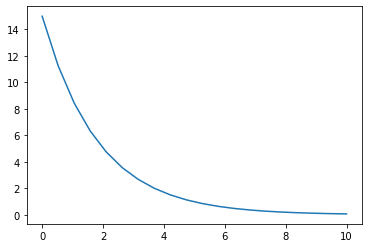

In [101]:
euler2 = AExplicitEuler(f, x0 = 15., interval = [0., 10.], N = 20)
euler2.solve()
euler2.plot()

### Encapsulation

다음 예제에서는 python function을 확장하여, 더하기와 곱하기의 산술 연산이 가능한 ```Function``` class를 생성한다.  

즉, 수치적 함수 $f$와 $g$에 대해, $f+g$를 자연스럽게 생성하고자 한다.  

아래 코드의 구현 방식을 보면 ```__add__```와 ```__mul__```이 조금 다르게 구현되었지만, 전반적인 기능은 비슷하다.

핵심은 두 함수를 합하거나 곱하는 기능을 가진 ```Function``` class를 생성하여 반환하는 것이다.  

```__mul__```에서 ```type(self)```는 곧 ```Function```이고 ```Function(prod)```로 인스턴스를 생성하여 반환하도록 되어 있다.

In [102]:
class Function:
    def __init__(self, f):
        self.f = f
        
    def __call__(self, x):
        return self.f(x)
    
    def __add__(self, g):
        new_Function = Function(lambda x: self(x) + g(x))
        return new_Function
        
    def __mul__(self, g): 
        def prod(x):
            return self.f(x) * g(x)
        return type(self)(prod)  
    
    def __radd__(self, g):
        return self + g
    
    def __rmul__(self, g):
        return self * g

In [103]:
f1 = Function(lambda x: x**2)
f2 = Function(lambda x: 2*x)
f3 = f1 + f2

In [104]:
type(f3)

__main__.Function

In [105]:
f3(10) == f1(10) + f2(10)

True

만약,   
```f1 = lambda x: x**2```  
```f2 = lambda x: 2*x```  
로 정의하였다면 다음 코드는 에러가 발생한다.  
```f3 = f1 + f2```

다음은 Chevysehv 다항식과 관련된 예제이다.  

먼저 Chevysehv 다항식인 $T_i$는 $[-1, 1]$에서 다음으로 정의된다.   

$$ T_i(x) = \cos (i \arccos(x)) $$

위의 ```Function``` 클래스를 통해 구현할 수 있다.  

In [106]:
T5 = Function(lambda x: np.cos(5 * np.arccos(x)))
T6 = Function(lambda x: np.cos(6 * np.arccos(x)))

그리고  Chevysehv 다항식에 대한 다음의 성질을 계산하여 확인하고 싶다.

$$ \int_{-1}^{1} \frac{1}{\sqrt{1 - x^2}} T_i(x) T_j(x) dx = 0, \text{ for } i \neq j $$

적분은 ```scipy.integrate.quad```를 이용하여 수치적으로 계산한다.

In [107]:
import scipy.integrate as sci

weight = Function(lambda x: 1 / np.sqrt((1 - x ** 2)))

[integral, errorestimate] = sci.quad(weight * T5 * T6, -1, 1) 

integral

-6.372803857338115e-17

마찬가지로, 

```T5 = lambda x: cos(5 * arccos(x))```   
```T6 = lambda x: cos(6 * arccos(x))```

로 정의하였다면 ```T5 * T6```는 에러가 발생한다.

### Decorator

데코레이터는 기존의 함수 등 원래의 코드를 수정하지 않고, 새로운 기능을 추가할 수 있도록 하는 Python의 디자인 패턴이다.  

Decorator는 함수나 class로 구현된다.  

함수가 수행되기 전, decorator가 먼저 실행되는 개념이며, python에서는 함수가 하나의 객체이기 때문에, 변수에 저장될 수 있다는 점을 이용한다.

다음의 ```how_sparse```는 numpy array에 0이 아닌 원소의 개수를 측정한다.

In [108]:
def how_sparse(A):
    return len(A.reshape(-1).nonzero()[0])

In [109]:
how_sparse(np.array([0, 1, 2, 0, 0, 5]))

3

In [110]:
type(how_sparse)

function

하지만 python list는 ```.reshape``` method가 없기 때문에, 인자로 리스트를 전달한 다음의 코드는 에러가 발생한다.  

```how_sparse([0, 1, 2, 0, 0, 5])```

리스트를 인자로 받았을 때도  ```how_sparse``` 함수가 작동하게 하려면,
```how_sparse```를 수정해야 할 것으로 보인다. 

하지만, 여기서는 decorator 방법을 이용하여, 원래 코드를 수정하지 않고 해결한다.

다음의 ```cast2array``` 함수는 주어진 함수 ```f```의 인자 ```obj```를 ```np.array(obj)```로 바꾸어 ```f```의 인자로 전달할 수 있게 한다.

In [111]:
def cast2array(f):
    return lambda obj: f(np.array(obj))

혹은 더 자세히 풀어쓰면,

In [112]:
def cast2array(f):
    def wrapper(obj):
        return f(np.array(obj))
    return wrapper

In [113]:
cast2array(how_sparse)([0, 1, 2, 0, 0, 5])

3

```cast2array```가 다른 함수 ```f```를 감싸는 구조라 wrapper라고 불리우기도 한다.

```@cast2array``` 명령을 이용하면, 더 깔끔하게 표현할 수 있다.  
이를 데코레이터라고 하며, ```how_sparse```가 호출되면 이를 ```cast2array(how_sparse)```로 바꾸어 실행시키는 개념이라 볼 수 있다.  

In [114]:
@cast2array
def how_sparse(A):
    return len(A.reshape(-1).nonzero()[0])

In [115]:
how_sparse([0,1,2,0,100])

3

클래스 또한 데코레이터로 활용될 수 있다.  

다음의 예제에서 ```echo``` class는 주어진 함수 ```f```의 인자들을 화면에 출력하는 역할을 한다.  

그리고 ```__call__```의 ```return``` 에서 ```self.f(*args, **kwargs)```를 통해 함수를 그대로 실행한 결과를 반환한다.

In [116]:
class echo:
    
    text = 'Input parameters of {name}\n'+\
        'Positional parameters {args}\n'+\
        'Keyword parameters {kwargs}\n'
    
    def __init__(self, f):
        print("## Echo instance created...")
        self.f = f
        
    def __call__(self, *args, **kwargs):
        print("## Echo instance called...")
        print("\n")
        print(self.text.format(name = self.f.__name__, args = args, kwargs = kwargs))
        return self.f(*args, **kwargs)

아래 코드에서는 ```echo(how_sparse)```로 인스턴스가 생성되고, 이 인스턴스에 ```([0,1,2,0,100])```의 인자를 입력하면, ```__call__``` method가 호출되어 print 문이 출력된다.

In [117]:
echo(how_sparse)([0,1,2,0,100])

## Echo instance created...
## Echo instance called...


Input parameters of wrapper
Positional parameters ([0, 1, 2, 0, 100],)
Keyword parameters {}



3

In [118]:
echo(np.linspace)(0, 1, num = 3)

## Echo instance created...
## Echo instance called...


Input parameters of linspace
Positional parameters (0, 1)
Keyword parameters {'num': 3}



array([0. , 0.5, 1. ])

위에서처럼 데코레이터를 통해 더 간단히 표현할 수 있다.

In [119]:
@echo
def how_sparse(A):
    return len(A.reshape(-1).nonzero()[0])

## Echo instance created...


In [120]:
how_sparse(np.array([0,1,2]))

## Echo instance called...


Input parameters of how_sparse
Positional parameters (array([0, 1, 2]),)
Keyword parameters {}



2

```how_sparse```는 ```echo``` type을 지닌다.

In [121]:
how_sparse

In [122]:
type(how_sparse)

__main__.echo

In [123]:
isinstance(how_sparse, echo)

True

In [124]:
how_sparse.f

<function __main__.how_sparse(A)>

다른 예제를 보자.

In [125]:
@echo
def line(m, b, x):
    return m * x + b

## Echo instance created...


그러면 ```line``` 함수는 호출될 때마다, decorator에 의해 ```__call__``` method가 호출되면서 정보가 출력된다.

In [126]:
line(2., 5., 3.)

## Echo instance called...


Input parameters of line
Positional parameters (2.0, 5.0, 3.0)
Keyword parameters {}



11.0

In [127]:
line(2., 5., x=3.)

## Echo instance called...


Input parameters of line
Positional parameters (2.0, 5.0)
Keyword parameters {'x': 3.0}



11.0

In [128]:
type(line)

__main__.echo

다음의 예제에서는 함수들이 몇 번 호출되는지 세는 decorator를 만든다.

In [129]:
class CountCalls:
    """
    Decorator that keeps track of the number of times 
    a function is called.
    """
    instances = []
    
    def __init__(self, f):
        #print("## Echo instance created...", repr(self))
        self.f = f
        self.num = 0
        self.instances.append(self)
        
    def __call__(self, *args, **kwargs):
        #print("## Echo instance called...", repr(self))
        self.num += 1
        return self.f(*args, **kwargs)
    
    @classmethod
    def counts(cls):
        """
        Return a dict of {function: # of calls} for all 
        registered functions.
        """
        return dict([(count_inst.f.__name__, count_inst.num) for count_inst in cls.instances ])

In [130]:
@CountCalls
def line(m, b, x):
    return m * x + b

@CountCalls 
def parabola(a, b, c, x):
    return a * x ** 2 + b * x + c

In [131]:
line.num

0

In [132]:
parabola.num

0

In [133]:
line(3., -1., 1.)
line(1., 1., 2.)
parabola(4., 5., -1., 2.)

25.0

In [134]:
CountCalls.counts() 

{'line': 2, 'parabola': 1}

In [135]:
line.num

2

In [136]:
parabola.num

1

### 클래스 활용 예제

파이썬 내장 dictionary 타입을 사용하면 동적인 내부 상태를 잘 유지할 수 있다.  
즉, 어떤 값이 들어올지 미리 알 수 없는 상황에 유용하게 활용된다.  
예를 들어, 학생들의 점수를 기록해야 하는데, 학생의 이름을 미리 알 수 없다고 하자.  
이럴 때, 학생 이름으로 미리 정의된 attribute를 사용하는 대신, dictionary를 이용할 수 있다.

In [137]:
class SimpleGradebook:
    def __init__(self):
        self._grades = {}

    def add_student(self, name):
        self._grades[name] = []

    def report_grade(self, name, score):
        self._grades[name].append(score)

    def average_grade(self, name):
        grades = self._grades[name]
        return sum(grades) / len(grades)

이 클래스는 다음과 같이 이용할 수 있다.

In [138]:
book = SimpleGradebook()
book.add_student('Isaac Newton')
book.report_grade('Isaac Newton', 90)
book.report_grade('Isaac Newton', 95)
book.report_grade('Isaac Newton', 85)

In [139]:
print(book.average_grade('Isaac Newton'))

90.0


이 클래스를 확장하여, 과목별 성적을 저장하고 싶다.

이를 위해 학생 이름을 key로 하는 dictionary를 만들고, 이 dictionary의 value는 다시 과목 이름을 key로 하는 dictionary이다.

아래에서 사용하는 ```defaultdict```는 ```dict```의 서브클래스로서 값을 지정하지 않을 경우 default값이 배정된다.

In [140]:
from collections import defaultdict

In [141]:
int_dict = defaultdict(int)
int_dict["a"]

0

In [142]:
list_dict = defaultdict(list)
list_dict[1]

[]

In [143]:
class BySubjectGradebook:
    def __init__(self):
        self._grades = {}                       # Outer dict

    def add_student(self, name):
        self._grades[name] = defaultdict(list)  # Inner dict
        
    def report_grade(self, name, subject, grade):
        by_subject = self._grades[name]
        grade_list = by_subject[subject]
        grade_list.append(grade)

    def average_grade(self, name):
        by_subject = self._grades[name]
        total, count = 0, 0
        for grades in by_subject.values():
            total += sum(grades)
            count += len(grades)
        return total / count

In [144]:
book = BySubjectGradebook()
book.add_student('Albert Einstein')
book._grades

{'Albert Einstein': defaultdict(list, {})}

In [145]:
book.report_grade('Albert Einstein', 'Math', 75)
book.report_grade('Albert Einstein', 'Math', 65)
book.report_grade('Albert Einstein', 'Gym', 90)
book.report_grade('Albert Einstein', 'Gym', 95)
book._grades

{'Albert Einstein': defaultdict(list, {'Math': [75, 65], 'Gym': [90, 95]})}

In [146]:
print(book.average_grade('Albert Einstein'))

81.25


평균을 낼 때, 중간고사와 기말고사가 다른 시험보다 더 큰 가중치를 갖게 하고 싶다.  
현재 가장 안쪽의 dictionary의 값이 성적의 리스트이지만, 이를 (성적, 가중치) 튜플의 리스트로 변경하고자 한다.  

In [147]:
book._grades["Albert Einstein"]["Math"]

[75, 65]

In [148]:
class WeightedGradebook:
    def __init__(self):
        self._grades = {}

    def add_student(self, name):
        self._grades[name] = defaultdict(list)

    def report_grade(self, name, subject, score, weight):
        by_subject = self._grades[name]
        grade_list = by_subject[subject]
        grade_list.append((score, weight))


    def average_grade(self, name):
        by_subject = self._grades[name]

        score_sum, score_count = 0, 0
        for subject, scores in by_subject.items():
            subject_avg, total_weight = 0, 0
            for score, weight in scores:
                subject_avg += score * weight
                total_weight += weight

            score_sum += subject_avg / total_weight
            score_count += 1

        return score_sum / score_count

점점 코드가 복잡해지고 있다.

In [149]:
book = WeightedGradebook()
book.add_student('Albert Einstein')
book.report_grade('Albert Einstein', 'Math', 75, 0.05)
book.report_grade('Albert Einstein', 'Math', 65, 0.15)
book.report_grade('Albert Einstein', 'Math', 70, 0.80)
book.report_grade('Albert Einstein', 'Gym', 100, 0.40)
book.report_grade('Albert Einstein', 'Gym', 85, 0.60)
book._grades

{'Albert Einstein': defaultdict(list,
             {'Math': [(75, 0.05), (65, 0.15), (70, 0.8)],
              'Gym': [(100, 0.4), (85, 0.6)]})}

In [150]:
print(book.average_grade('Albert Einstein'))

80.25


이와 같이 코드가 복잡해지면 더 이상 딕셔너리, 투플, 집합, 리스트 등의 내장 타입을 하용하지 말고 클래스의 계층 구조를 사용해야 한다.  

코드에서 값을 관리하는 부분이 점점 복잡해지고 있음을 깨달은 즉시 해당 기능을 클래스로 분리해야 한다.

클래스를 활용해 리팩터링하는 방법을 살펴보자.

먼저, 단순히 튜플들의 리스트로부터 출발해 보자.

In [151]:
grades = []
grades.append((95, 0.45))
grades.append((85, 0.55))
grades

[(95, 0.45), (85, 0.55)]

In [152]:
total = sum(score * weight for score, weight in grades)
total_weight = sum(weight for _, weight in grades)
average_grade = total / total_weight
print(average_grade)

89.5


이 코드의 문제점은 튜플에 저장된 원소의 위치를 사용해 접근한다는 것이다.  
예를 들어, 상황이 다음과 같이 바뀌어 추가적인 정보를 튜플에 저장한다고 하자.

In [153]:
grades = []
grades.append((95, 0.45, '참 잘했어요'))
grades.append((85, 0.55, '조금만 더 열심히'))
grades

[(95, 0.45, '참 잘했어요'), (85, 0.55, '조금만 더 열심히')]

튜플의 원소 개수가 늘어나면 ```for``` 구문도 그에 맞춰 변경해야 한다.

In [154]:
total = sum(score * weight for score, weight, _ in grades)
total_weight = sum(weight for _, weight, _ in grades)
average_grade = total / total_weight
print(average_grade)

89.5


```namedtuple```을 사용하여 보자.  
이 클래스의 인스턴스를 만들 때는 위치 기반 인자를 사용해도 되고, 키워드 기반 인자를 사용해도 된다.

In [155]:
from collections import namedtuple

Grade = namedtuple('Grade', ('score', 'weight'))

아래와 같이 instance를 만들어 사용할 수 있다.

In [156]:
g = Grade(100, 0.2)
g

Grade(score=100, weight=0.2)

In [157]:
g.score

100

In [158]:
g[0]

100

이제 여러 필요한 클래스를 정의한다.

먼저 ```Subject``` 클래스는 ```Grade```들의 리스트를 attribute로 가진다.  

각 학생의 과목별 가중 평균 점수 계산이 가능하도록 구현하였다.

In [159]:
class Subject:
    def __init__(self):
        self._grades = []

    def report_grade(self, score, weight):
        self._grades.append(Grade(score, weight))

    def average_grade(self):
        total, total_weight = 0, 0
        for grade in self._grades:
            total += grade.score * grade.weight
            total_weight += grade.weight
        return total / total_weight 

```Student``` 클래스는 ```Subject```들을 value로 가지는 ```defaultdict```를 attribute로 가진다.   
마찬가지로 학생의 전체 평균 점수 계산이 가능하다. 

In [160]:
class Student:
    def __init__(self):
        self._subjects = defaultdict(Subject)

    def get_subject(self, name):
        return self._subjects[name]

    def average_grade(self):
        total, count = 0, 0
        for subject in self._subjects.values():
            total += subject.average_grade()
            count += 1
        return total / count

마지막으로 ```Gradebook``` 클래스는 ```Student```를 값으로 가지는 ```defaultdict```이다.  
이름을 사용해 동적으로 학생들의 정보를 저장한다.

In [161]:
class Gradebook:
    def __init__(self):
        self._students = defaultdict(Student)

    def get_student(self, name):
        return self._students[name]

클래스를 잘 설정해 놓으면, 코드도 읽기 쉽고 확장성도 좋다.

In [162]:
book = Gradebook()
book

In [163]:
book._students

defaultdict(__main__.Student, {})

In [164]:
albert = book.get_student('Albert Einstein')
albert

In [165]:
albert._subjects

defaultdict(__main__.Subject, {})

In [166]:
math = albert.get_subject('Math')
math

In [167]:
math._grades

[]

In [168]:
math.report_grade(75, 0.05)
math.report_grade(65, 0.15)
math.report_grade(70, 0.80)

In [169]:
math._grades

[Grade(score=75, weight=0.05),
 Grade(score=65, weight=0.15),
 Grade(score=70, weight=0.8)]

In [170]:
albert._subjects['Math']._grades

[Grade(score=75, weight=0.05),
 Grade(score=65, weight=0.15),
 Grade(score=70, weight=0.8)]

In [171]:
albert.get_subject('Math')._grades

[Grade(score=75, weight=0.05),
 Grade(score=65, weight=0.15),
 Grade(score=70, weight=0.8)]

In [172]:
gym = albert.get_subject('Gym')
gym.report_grade(100, 0.40)
gym.report_grade(85, 0.60)

In [173]:
albert.get_subject('Gym')._grades

[Grade(score=100, weight=0.4), Grade(score=85, weight=0.6)]

In [174]:
print(albert.average_grade())

80.25
